In [254]:
import cv2
import matplotlib.pyplot as plt
import csv
# Import datasets, classifiers and performance metrics
from skimage.feature import hog
from skimage.transform import resize
from sklearn import datasets, svm, metrics
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
import skimage.io as io
from commonfunctions import *
import pandas as pd
from imutils import contours as imcnts
import os
from skimage.morphology import skeletonize,thin
import statistics

In [23]:
#variable that will help us to resize the extracted handwritten digits
RESIZED_IMAGE_WIDTH = 30
RESIZED_IMAGE_HEIGHT= 40

In [24]:
def extract_hog_features(img):
    """
    TODO
    You won't implement anything in this function. You just need to understand it 
    and understand its parameters (i.e win_size, cell_size, ... etc)
    """
#     img = cv2.resize(img, target_img_size)
    win_size = (28, 28)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h

In [25]:
# digits = datasets.load_digits()

digitsHead = pd.read_csv('train.csv') 



# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, label in zip(axes, digits.images, digits.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title("Training: %i" % label)

In [26]:
digitsHead.head()
digitsHead.shape

(42000, 785)

In [27]:
# # flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))

# # Create a classifier: a support vector classifier
# clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
# X_train, X_test, y_train, y_test = train_test_split(
#     data, digits.target, test_size=0.5, shuffle=False
# )

# # Learn the digits on the train subset
# clf.fit(X_train, y_train)
# img = cv2.imread('./images/88.jpg')
# show_images([img])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img.shape)
# img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)

# show_images([img])


# # Predict the value of the digit on the test subset
# # predicted = clf.predict(img.reshape(1,-1))
# # print(predicted)

In [28]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, prediction in zip(axes, img.reshape(1,-1), predicted):
#     ax.set_axis_off()
#     image = image.reshape(8, 8)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Prediction: {prediction}")

In [29]:
trainFile = "./train.csv"
labels = []
hog_result = []
img = np.array((28, 28), dtype=np.uint8)

with open(trainFile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            labels.append(row[0])
            img = np.array(row[1:], dtype=np.uint8).reshape((28, 28))
            line_count += 1
            img = 255-img
            print(line_count)
#             show_images([img], [row[0]])
            hog_result.append(extract_hog_features(img))
            

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163


3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005


5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882


7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606


9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545


10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
1098

12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
1239

14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
1418

15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
1587

17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
1766

19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
19175
19176
19177
19178
19179
19180
19181
19182
19183
19184
19185
19186
19187
19188
19189
19190
19191
19192
19193
19194
19195
19196
19197
19198
19199
19200
19201
19202
19203
19204
19205
19206
19207
19208
19209
19210
19211
19212
19213
19214
19215
19216
19217
19218
19219
19220
19221
19222
19223
19224
19225
19226
19227
19228
19229
19230
19231
19232
19233
19234
19235
19236
19237
19238
19239
19240
19241
19242
19243
19244
19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
19289
19290
19291
19292
1929

20552
20553
20554
20555
20556
20557
20558
20559
20560
20561
20562
20563
20564
20565
20566
20567
20568
20569
20570
20571
20572
20573
20574
20575
20576
20577
20578
20579
20580
20581
20582
20583
20584
20585
20586
20587
20588
20589
20590
20591
20592
20593
20594
20595
20596
20597
20598
20599
20600
20601
20602
20603
20604
20605
20606
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20628
20629
20630
20631
20632
20633
20634
20635
20636
20637
20638
20639
20640
20641
20642
20643
20644
20645
20646
20647
20648
20649
20650
20651
20652
20653
20654
20655
20656
20657
20658
20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
2071

22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
22336
22337
22338
22339
22340
22341
22342
22343
22344
22345
22346
22347
22348
22349
22350
22351
22352
22353
22354
22355
22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
2247

23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
24089
24090
24091
24092
24093
24094
24095
24096
24097
24098
24099
24100
24101
24102
2410

25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
2547

27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27176
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
27198
27199
27200
27201
27202
27203
27204
27205
2720

28758
28759
28760
28761
28762
28763
28764
28765
28766
28767
28768
28769
28770
28771
28772
28773
28774
28775
28776
28777
28778
28779
28780
28781
28782
28783
28784
28785
28786
28787
28788
28789
28790
28791
28792
28793
28794
28795
28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28903
28904
28905
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
2892

30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30314
30315
30316
30317
30318
30319
30320
30321
30322
30323
30324
30325
30326
30327
30328
30329
30330
30331
30332
30333
30334
30335
30336
30337
30338
30339
30340
30341
30342
30343
30344
30345
30346
30347
30348
30349
30350
30351
30352
30353
30354
30355
30356
30357
30358
30359
30360
30361
30362
30363
30364
30365
30366
30367
30368
30369
30370
30371
30372
30373
30374
30375
30376
30377
3037

31648
31649
31650
31651
31652
31653
31654
31655
31656
31657
31658
31659
31660
31661
31662
31663
31664
31665
31666
31667
31668
31669
31670
31671
31672
31673
31674
31675
31676
31677
31678
31679
31680
31681
31682
31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
31703
31704
31705
31706
31707
31708
31709
31710
31711
31712
31713
31714
31715
31716
31717
31718
31719
31720
31721
31722
31723
31724
31725
31726
31727
31728
31729
31730
31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
3181

33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33283
33284
33285
33286
33287
33288
33289
33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
3334

35035
35036
35037
35038
35039
35040
35041
35042
35043
35044
35045
35046
35047
35048
35049
35050
35051
35052
35053
35054
35055
35056
35057
35058
35059
35060
35061
35062
35063
35064
35065
35066
35067
35068
35069
35070
35071
35072
35073
35074
35075
35076
35077
35078
35079
35080
35081
35082
35083
35084
35085
35086
35087
35088
35089
35090
35091
35092
35093
35094
35095
35096
35097
35098
35099
35100
35101
35102
35103
35104
35105
35106
35107
35108
35109
35110
35111
35112
35113
35114
35115
35116
35117
35118
35119
35120
35121
35122
35123
35124
35125
35126
35127
35128
35129
35130
35131
35132
35133
35134
35135
35136
35137
35138
35139
35140
35141
35142
35143
35144
35145
35146
35147
35148
35149
35150
35151
35152
35153
35154
35155
35156
35157
35158
35159
35160
35161
35162
35163
35164
35165
35166
35167
35168
35169
35170
35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
3520

36432
36433
36434
36435
36436
36437
36438
36439
36440
36441
36442
36443
36444
36445
36446
36447
36448
36449
36450
36451
36452
36453
36454
36455
36456
36457
36458
36459
36460
36461
36462
36463
36464
36465
36466
36467
36468
36469
36470
36471
36472
36473
36474
36475
36476
36477
36478
36479
36480
36481
36482
36483
36484
36485
36486
36487
36488
36489
36490
36491
36492
36493
36494
36495
36496
36497
36498
36499
36500
36501
36502
36503
36504
36505
36506
36507
36508
36509
36510
36511
36512
36513
36514
36515
36516
36517
36518
36519
36520
36521
36522
36523
36524
36525
36526
36527
36528
36529
36530
36531
36532
36533
36534
36535
36536
36537
36538
36539
36540
36541
36542
36543
36544
36545
36546
36547
36548
36549
36550
36551
36552
36553
36554
36555
36556
36557
36558
36559
36560
36561
36562
36563
36564
36565
36566
36567
36568
36569
36570
36571
36572
36573
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
3659

38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
38316
38317
38318
38319
38320
38321
38322
38323
38324
38325
38326
38327
38328
38329
38330
38331
38332
38333
38334
38335
38336
38337
38338
38339
38340
38341
38342
38343
38344
38345
38346
38347
38348
38349
38350
38351
38352
38353
38354
38355
38356
38357
38358
38359
38360
38361
38362
38363
38364
38365
38366
38367
38368
38369
38370
38371
38372
38373
38374
38375
38376
38377
38378
38379
38380
38381
38382
38383
38384
38385
38386
38387
38388
38389
38390
38391
38392
38393
38394
38395
38396
38397
38398
38399
38400
38401
38402
38403
38404
38405
38406
38407
38408
38409
38410
38411
38412
38413
38414
38415
38416
38417
38418
38419
38420
38421
38422
38423
38424
3842

39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
39642
39643
39644
39645
39646
39647
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
39733
39734
39735
39736
39737
39738
39739
39740
39741
39742
39743
39744
39745
39746
39747
39748
39749
39750
39751
39752
39753
39754
39755
39756
39757
39758
39759
39760
39761
39762
39763
39764
39765
39766
39767
39768
39769
39770
39771
39772
39773
39774
39775
39776
39777
39778
39779
39780
39781
39782
39783
39784
39785
39786
39787
39788
39789
39790
39791
39792
39793
39794
39795
3979

41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
41037
41038
41039
41040
41041
41042
41043
41044
41045
41046
41047
41048
41049
41050
41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
41110
41111
41112
41113
41114
41115
41116
41117
41118
41119
41120
41121
41122
41123
41124
41125
41126
41127
41128
41129
41130
41131
41132
41133
41134
41135
41136
41137
41138
41139
41140
41141
41142
41143
41144
41145
41146
41147
41148
41149
41150
41151
41152
41153
41154
41155
41156
41157
41158
41159
41160
41161
41162
41163
41164
41165
4116

In [30]:
hog_features = np.array(hog_result)
labels = np.array(labels)

In [31]:
print(hog_features.shape)

(42000, 1296)


In [32]:
train, test,train_labels, test_labels = train_test_split(hog_features, labels, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

data = pd.DataFrame(np.array(train_labels))
data.value_counts()

Train Data Shape:  (33600, 1296)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 1296)
Test Label Shape:  (8400,)


1    3775
7    3508
3    3414
6    3352
9    3350
2    3331
0    3316
4    3233
8    3228
5    3093
dtype: int64

In [33]:
clf = svm.SVC(max_iter=100)

In [34]:
clf.fit(train, train_labels)
svm_predictions = clf.predict(test)
score = clf.score(test, test_labels)*100


print('SVM:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

E:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM:
Accuracy:  99.0%


In [35]:
knn = KNeighborsClassifier(n_neighbors=6, weights = 'uniform')
knn.fit(train, train_labels)
knn_predictions = knn.predict(test)
score = knn.score(test, test_labels)*100


print('KNN:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

KNN:
Accuracy:  98.19%


In [36]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=None)
rf.fit(train, train_labels)
predictions = rf.predict(test)
score = rf.score(test, test_labels)*100

print('RF:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

RF:
Accuracy:  98.35%


In [37]:
lr = LogisticRegression(warm_start=True, solver='liblinear', max_iter=100)
lr.fit(train, train_labels)
lr_predictions = lr.predict(test)
score = lr.score(test, test_labels)*100

print('LR:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

LR:
Accuracy:  98.51%


In [38]:
svm_unique, svm_counts = np.unique(svm_predictions, return_counts=True)
knn_unique, knn_counts = np.unique(knn_predictions, return_counts=True)
rf_unique, rf_counts = np.unique(predictions, return_counts=True)
lr_unique, lr_counts = np.unique(lr_predictions, return_counts=True)

In [39]:
print(np.asarray((svm_unique, svm_counts)).T)

[['0' '815']
 ['1' '914']
 ['2' '845']
 ['3' '933']
 ['4' '831']
 ['5' '698']
 ['6' '789']
 ['7' '894']
 ['8' '839']
 ['9' '842']]


In [40]:
print(np.asarray((knn_unique, knn_counts)).T)

[['0' '826']
 ['1' '920']
 ['2' '834']
 ['3' '934']
 ['4' '821']
 ['5' '689']
 ['6' '800']
 ['7' '878']
 ['8' '835']
 ['9' '863']]


In [41]:
print(np.asarray((rf_unique, rf_counts)).T)

[['0' '823']
 ['1' '908']
 ['2' '853']
 ['3' '927']
 ['4' '839']
 ['5' '696']
 ['6' '789']
 ['7' '895']
 ['8' '837']
 ['9' '833']]


In [42]:
print(np.asarray((lr_unique, lr_counts)).T)

[['0' '820']
 ['1' '918']
 ['2' '841']
 ['3' '933']
 ['4' '821']
 ['5' '698']
 ['6' '786']
 ['7' '889']
 ['8' '844']
 ['9' '850']]


[' - 0.jpg', ' - 1.jpg', ' - 10.jpg', ' - 11.jpg', ' - 12.jpg', ' - 13.jpg', ' - 14.jpg', ' - 15.jpg', ' - 16.jpg', ' - 17.jpg', ' - 2.jpg', ' - 3.jpg', ' - 4.jpg', ' - 5.jpg', ' - 6.jpg', ' - 7.jpg', ' - 8.jpg', ' - 9.jpg']


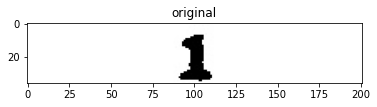

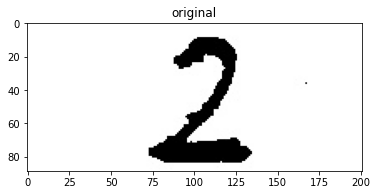

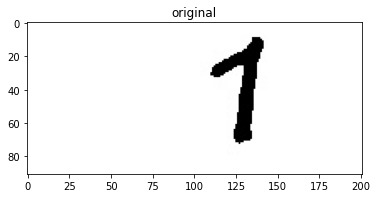

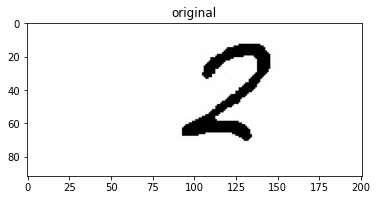

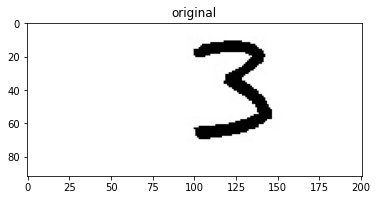

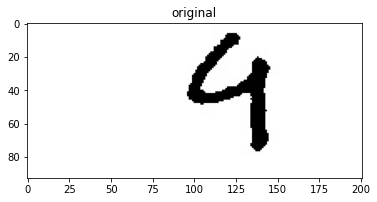

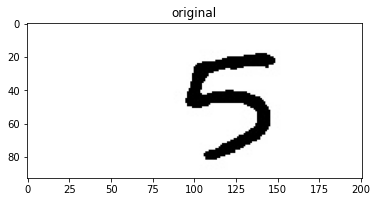

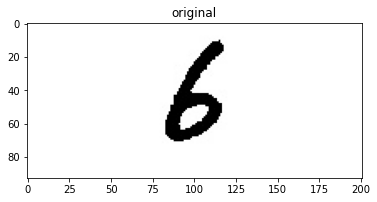

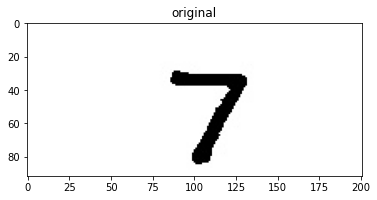

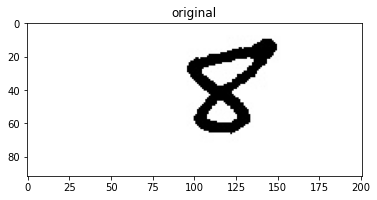

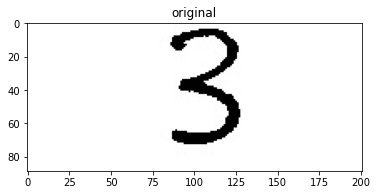

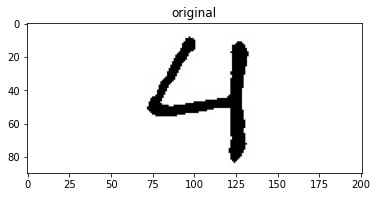

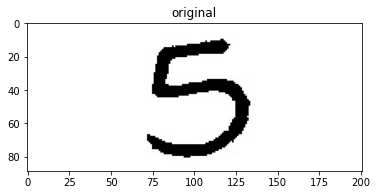

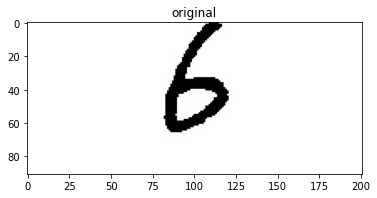

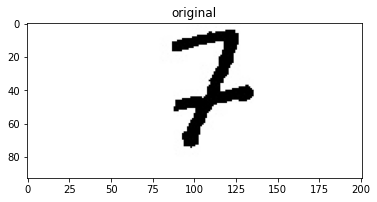

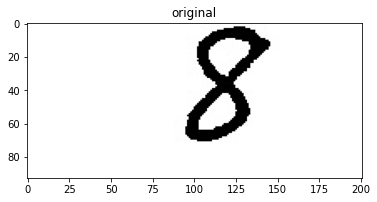

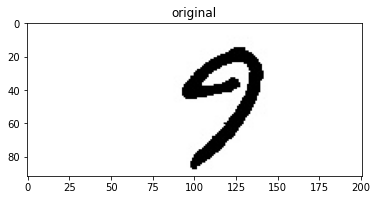

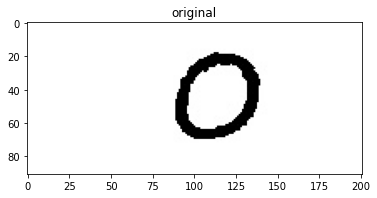

In [43]:
imgList = os.listdir('../../Results/Results/14/3')
print(imgList[:])
imgsPath = "../../Results/Results/14/3/"
imgs = []
warped_path = "./warpedImgs/"
for imgName in imgList:   
    img = cv2.imread(imgsPath+imgName)
    imgs.append(img)
    show_images([img], ['original'])

imgs_original = imgs[:]

In [44]:
svc_predictions = []
knn_predictions = []
rf_predictions = []
lr_predictions = []
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

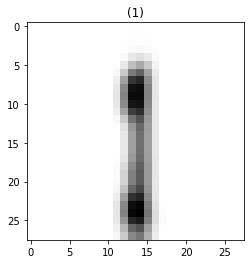

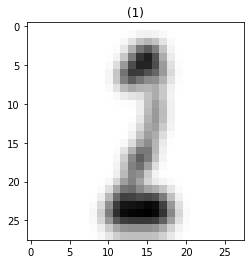

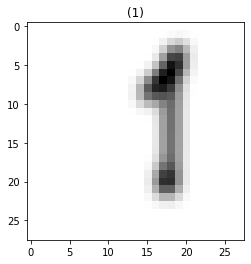

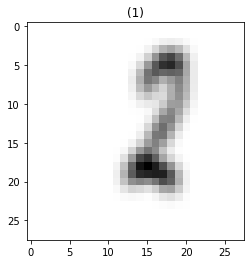

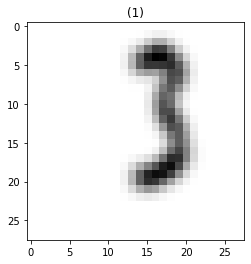

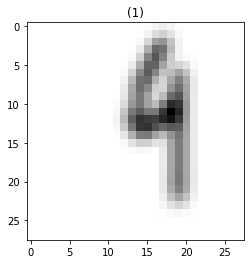

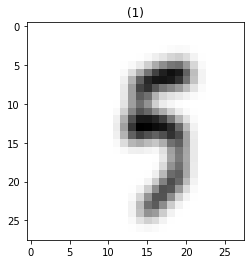

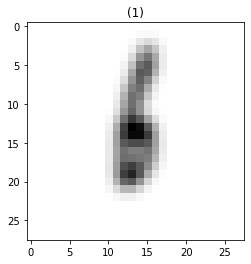

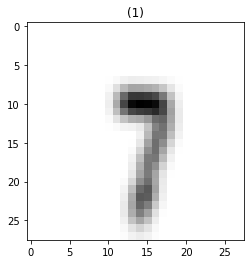

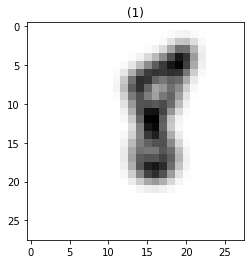

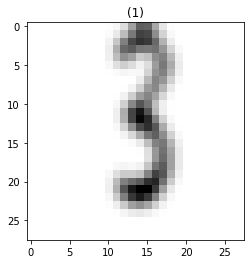

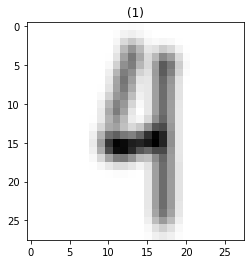

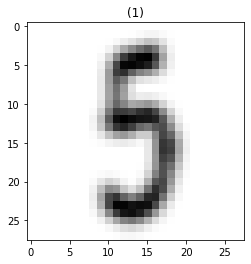

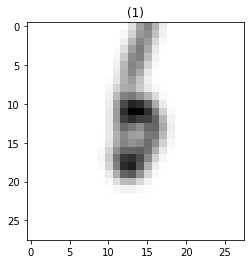

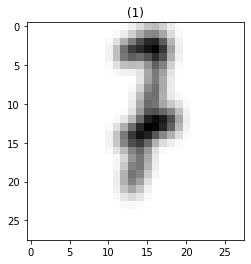

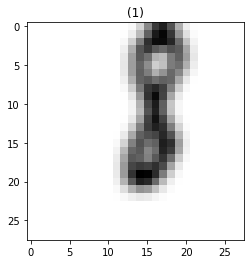

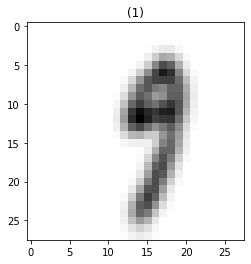

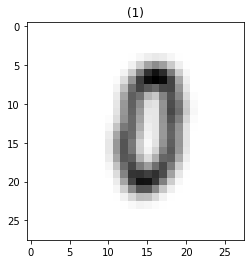

In [45]:
for img in imgs:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_LANCZOS4|cv2.INTER_NEAREST)
    img = cv2.GaussianBlur(img, (5,5),0)
#     img = cv2.bilateralFilter(img, 20, 40, 40)
    show_images([img])
    hog_of_img = np.array(extract_hog_features(img))
    hog_of_img = hog_of_img.reshape(1,-1)
    value_SVC = clf.predict(hog_of_img)
    value_KNN = knn.predict(hog_of_img)
    value_RF = rf.predict(hog_of_img)
    value_LR = lr.predict(hog_of_img)
    svc_predictions.append(value_SVC)
    knn_predictions.append(value_KNN)
    rf_predictions.append(value_RF)
    lr_predictions.append(value_LR)

In [46]:
svc_predictions = np.concatenate( svc_predictions, axis=0 )
print('Svc: ',svc_predictions)

Svc:  ['1' '1' '1' '8' '2' '4' '5' '6' '7' '6' '3' '4' '5' '6' '4' '6' '9' '0']


In [47]:
knn_predictions = np.concatenate( knn_predictions, axis=0 )
print('Knn: ', str(knn_predictions))

Knn:  ['1' '2' '1' '8' '0' '4' '5' '6' '9' '6' '3' '4' '5' '6' '1' '6' '9' '0']


In [48]:
rf_predictions = np.concatenate( rf_predictions, axis=0 )
print('RF: ', str(rf_predictions))

RF:  ['1' '2' '1' '8' '2' '4' '4' '6' '9' '6' '3' '4' '5' '6' '8' '6' '4' '0']


In [49]:
lr_predictions = np.concatenate(lr_predictions, axis = 0)
print('LR: ', str(lr_predictions))

LR:  ['1' '1' '1' '2' '2' '4' '5' '6' '9' '6' '3' '4' '5' '6' '3' '1' '9' '0']


In [256]:
def extract_the_paper_from_image(image):
#         gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         adaptively_thresholded = cv2.adaptiveThreshold(gray_scale,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
        contours, _ = cv2.findContours(image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        if (len(contours) > 0):
            contours = sorted(contours, key=cv2.contourArea, reverse=True)
            paper_contour = None
            paper = image
            for cnt in contours:
                peri = cv2.arcLength(cnt, True)
                ratio = 0.01
                approx = cv2.approxPolyDP(cnt, ratio*peri, True)
                print(len(approx),cv2.contourArea(cnt), image.shape[0]*image.shape[1])
                if (len(approx) == 4 and cv2.contourArea(cnt)>0.2*image.shape[0]*image.shape[1]):
                    paper_contour = approx
                    paper = four_point_transform(image, paper_contour.reshape(4, 2))
                else:
                    break
        return paper

In [257]:
def classifier_algorithm (myc, average_area, image):
    strFinalString=""
    print(strFinalString)
    [intX, intY, intW, intH] = cv2.boundingRect(myc)
    imgROI = image[intY:intY+intH, intX:intX+intW]
    print(cv2.contourArea(myc),average_area)
    if(cv2.contourArea(myc)>1.9*average_area):
        print('connected contours found')
        erosion = cv2.erode(imgROI, np.ones((2, 2), np.uint8),iterations=1)
        show_images([erosion], ['after erosion'])
        connected_contours,_ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        connected_contours,_=imcnts.sort_contours(connected_contours,method='left-to-right')
        print(len(connected_contours))
        for connected_contour in connected_contours:
            strFinalString = strFinalString + classifier_algorithm(connected_contour, average_area,erosion)
    else:
        imgROIResized = cv2.resize(imgROI, (28, 28), cv2.INTER_NEAREST)

        show_images([imgROIResized], ['test Sample'])

        finalResized = imgROIResized.reshape((-1,1))

    #     finalResized = np.float32(finalResized)
        hog_of_img = np.asarray(extract_hog_features(imgROIResized))
        hog_of_img = hog_of_img.reshape(1,-1)
        knn_value = knn.predict(hog_of_img)
        rf_value = rf.predict(hog_of_img)
        svc_value = clf.predict(hog_of_img)
        lr_value = lr.predict(hog_of_img)
        print(knn_value, rf_value, svc_value, lr_value)
        tmpString = str(int(knn_value))
        print(strFinalString)
        print(tmpString)
        strFinalString = strFinalString + tmpString
    return strFinalString

In [258]:
# imgTestSample = cv2.imread("../../Results/Results/9/0/13.jpg")
# #th = imgTestSample 
# #th=np.invert(th)
# bf = cv2.bilateralFilter(imgTestSample, 50, 100, 100) #to remove noise
# imgGray = cv2.cvtColor(bf, cv2.COLOR_BGR2GRAY)

In [259]:
# th = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7 , 3)
# th=np.invert(th)
# show_images([th], ['test sample'])
# imgDigit = th

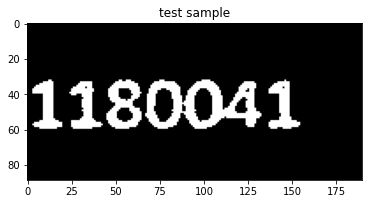

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
21 1187.5 16910


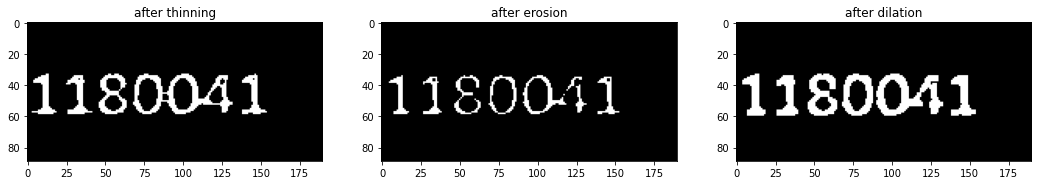

5

192.0 197.5


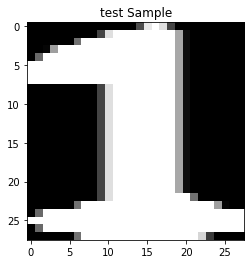

['1'] ['1'] ['1'] ['1']

1

197.5 197.5


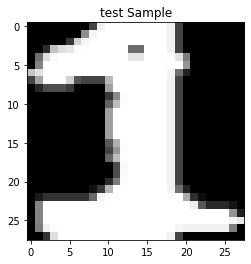

['4'] ['1'] ['4'] ['1']

4

392.0 197.5
connected contours found


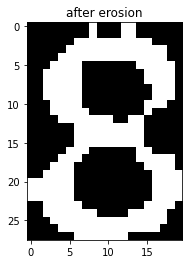

1

340.0 197.5


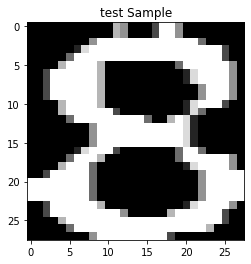

['8'] ['8'] ['8'] ['2']

8

1187.5 197.5
connected contours found


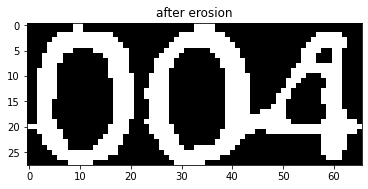

2

392.0 197.5
connected contours found


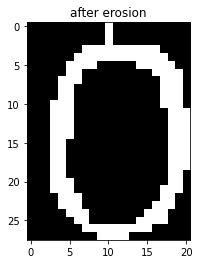

1

347.0 197.5


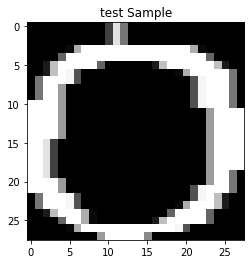

['0'] ['0'] ['0'] ['0']

0

646.0 197.5
connected contours found


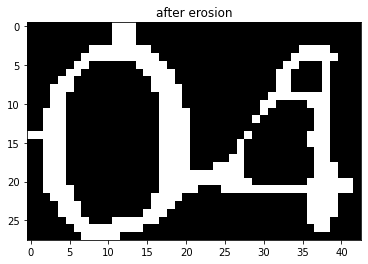

1

458.5 197.5
connected contours found


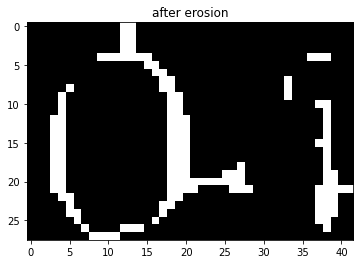

5

12.0 197.5


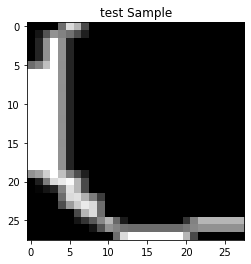

['1'] ['1'] ['6'] ['6']

1

41.5 197.5


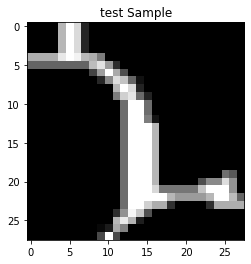

['1'] ['1'] ['1'] ['1']

1

0.0 197.5


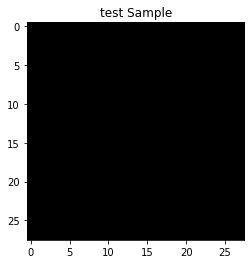

['1'] ['1'] ['1'] ['1']

1

0.0 197.5


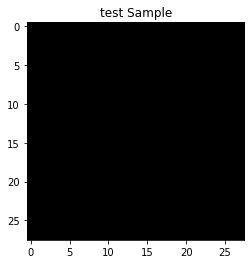

['1'] ['1'] ['1'] ['1']

1

13.5 197.5


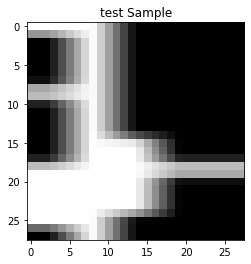

['1'] ['4'] ['4'] ['4']

1

197.5 197.5


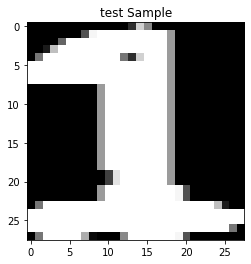

['1'] ['1'] ['1'] ['1']

1


In [264]:
imgTestSample = cv2.imread("../../Results/Results/9/0/7.jpg")
#th = imgTestSample 
#th=np.invert(th)
bf = cv2.bilateralFilter(imgTestSample, 50, 100, 100) #to remove noise
imgGray = cv2.cvtColor(bf, cv2.COLOR_BGR2GRAY)





th = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7 , 3)
th=np.invert(th)
show_images([th], ['test sample'])
imgDigit = th






strFinalString = ""


#imgTestSample = cv2.imread("id dataset/test_image/7.png")
#skeleton = skeletonize(imgDigit/255)
thinned_img = thin(imgDigit,1)
print(thinned_img)
thinned_img = thinned_img.astype('uint8')
erosion = cv2.erode(thinned_img, np.ones((2, 2), np.uint8),iterations=1)
dilation = cv2.dilate(erosion, np.ones((3, 3), np.uint8),iterations=1)



imgDigit = extract_the_paper_from_image(imgDigit)
show_images([thinned_img,erosion,dilation], ['after thinning','after erosion','after dilation'])







area_sum=[]
cntr, h = cv2.findContours(imgDigit, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in cntr:
    area_sum = np.append(area_sum , [cv2.contourArea(cnt)])
average_area=area_sum/len(cntr)

average_area = statistics.median(area_sum)
    
cntr,_=imcnts.sort_contours(cntr,method='left-to-right')
print(len(cntr))
for myc in cntr:
    strFinalString = strFinalString + classifier_algorithm(myc, average_area,imgDigit)

In [265]:
print(strFinalString)  

1480111111
